# EDA GEOENOS
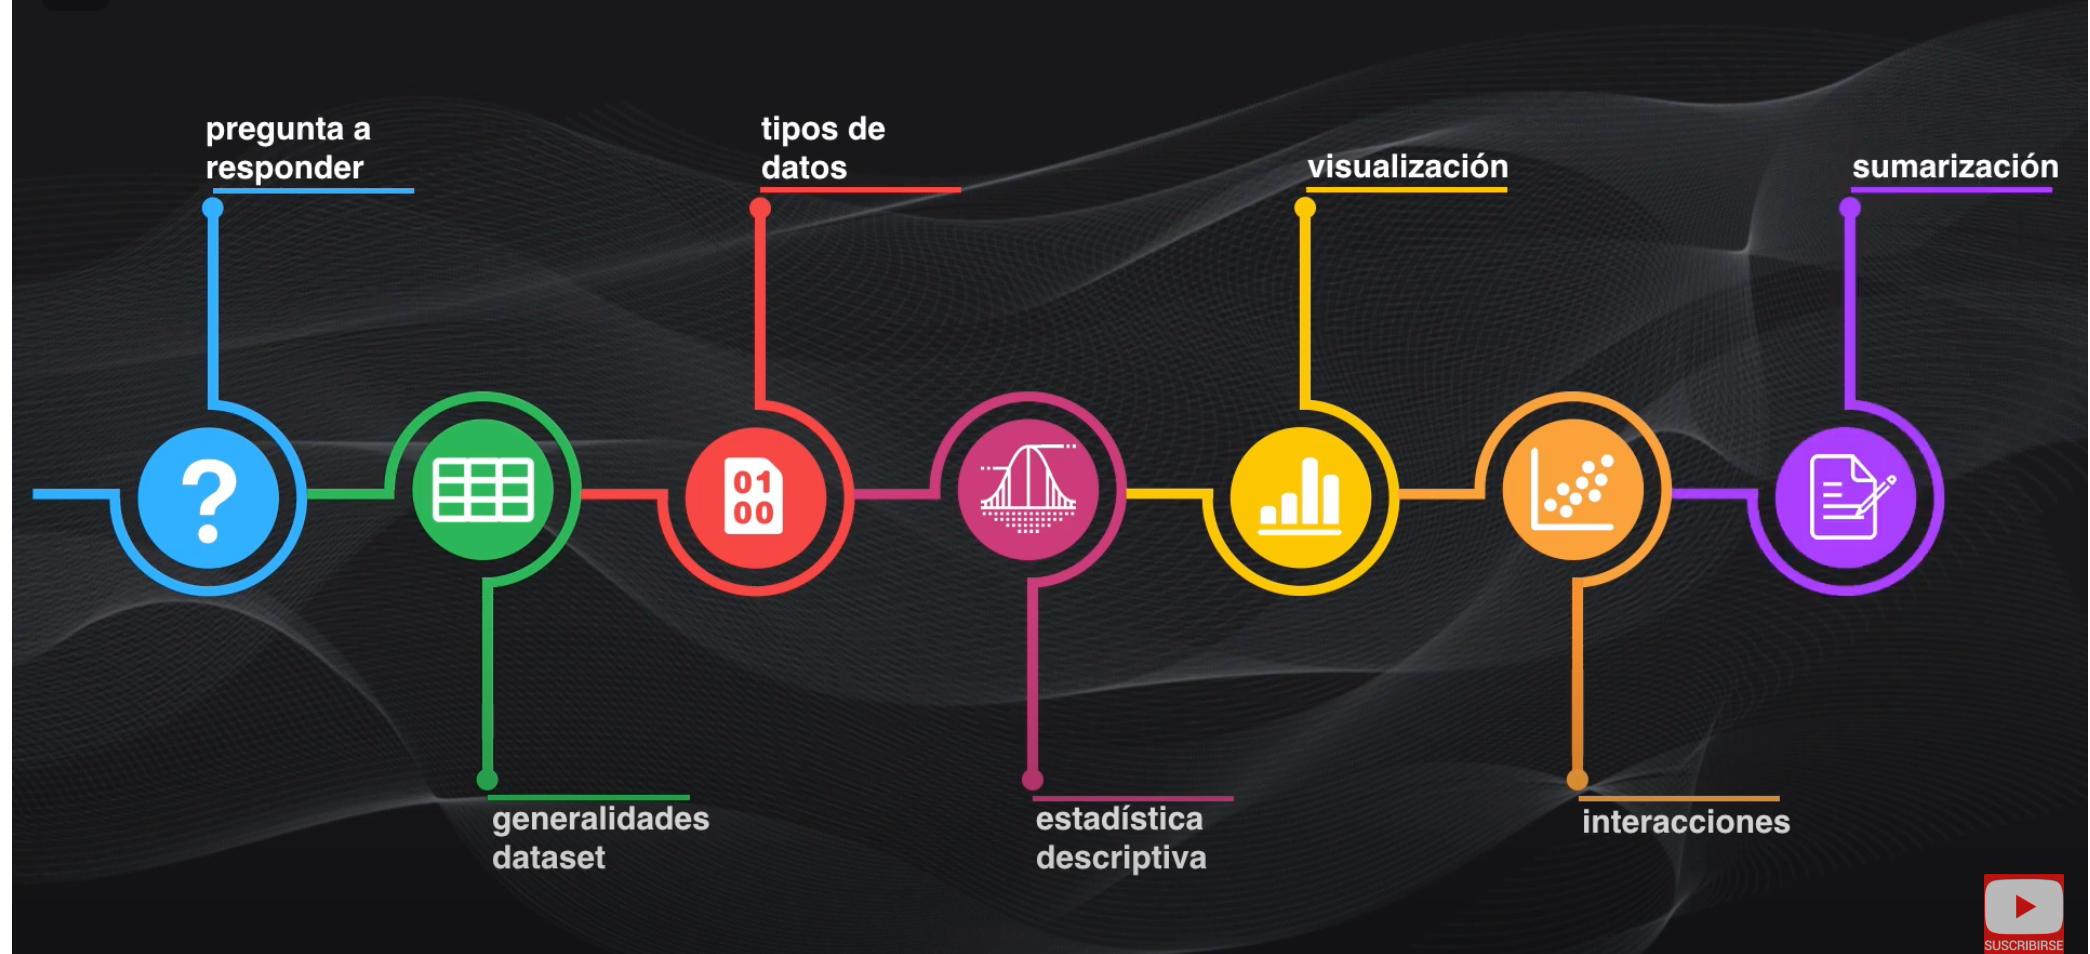

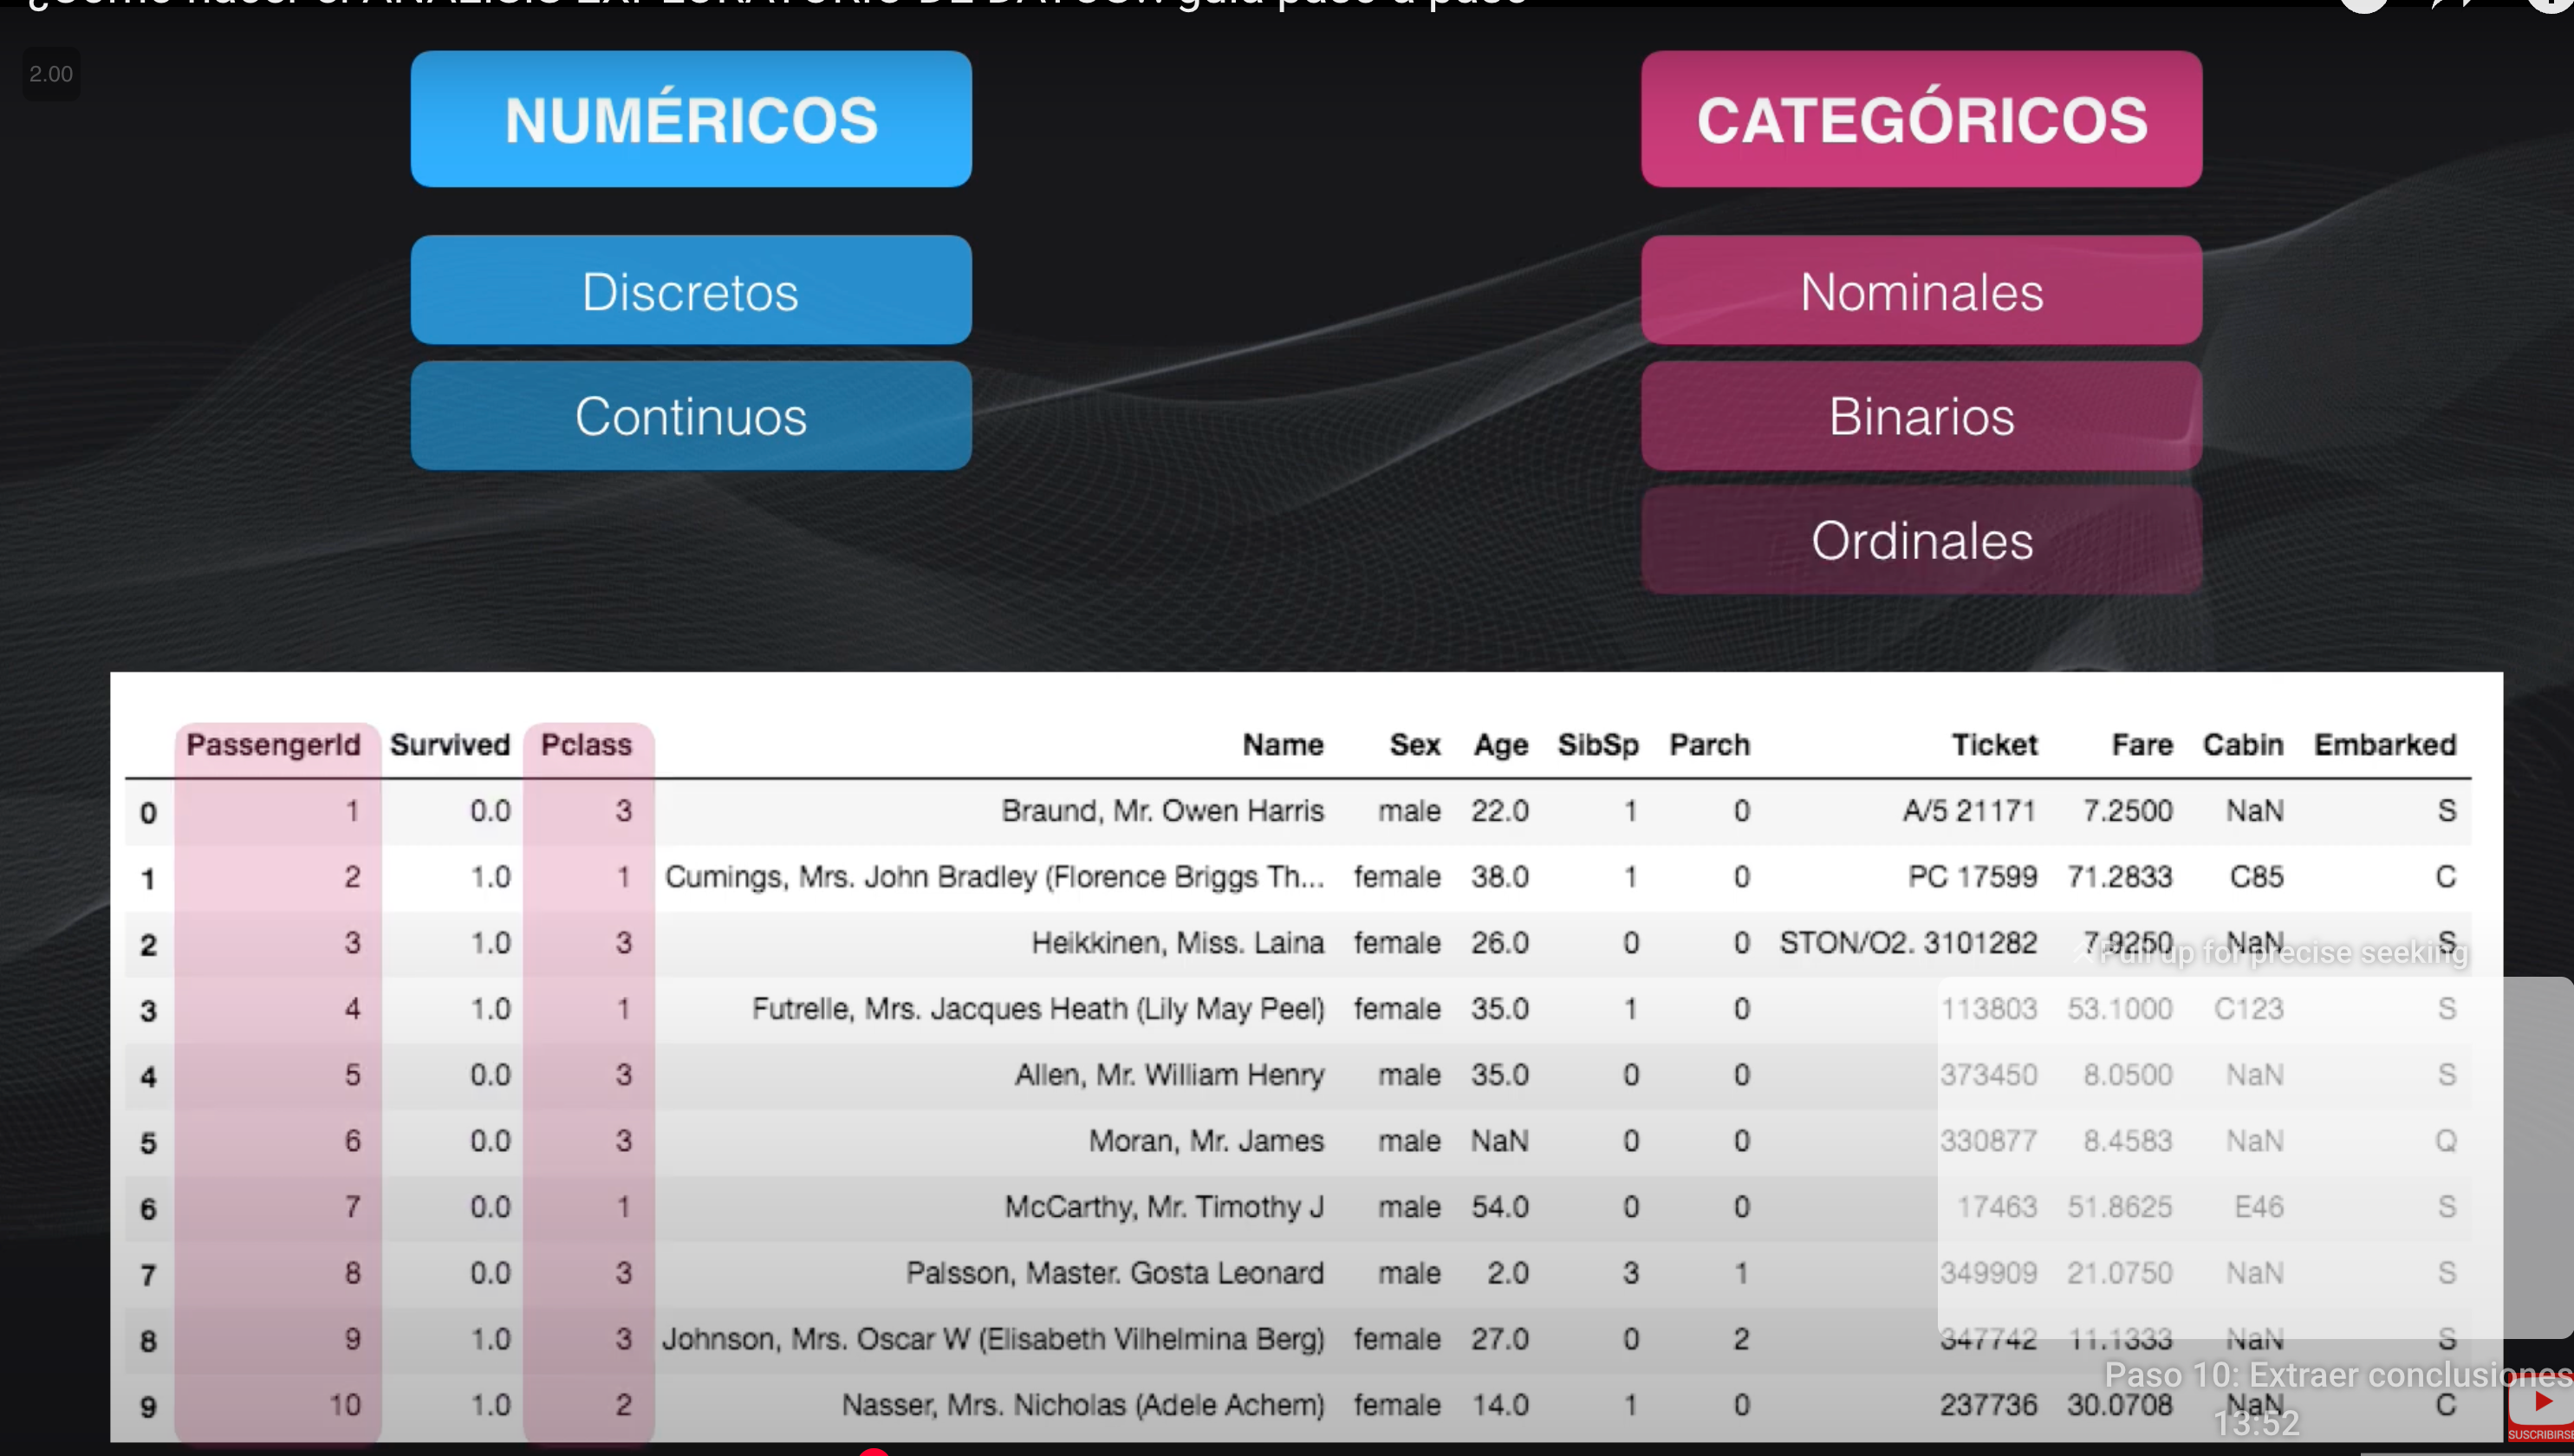
tipos de medidad:
 * tendencia central: media mediana moda (sensibles a valores atipicos)
 * variabilidad: rango, varianza, desviacion estandar

https://github.com/CodigoMaquina/code/blob/main/estadistica_ciencia_de_datos/graficas_retardo_autocorrelacion.ipynb


In [46]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns

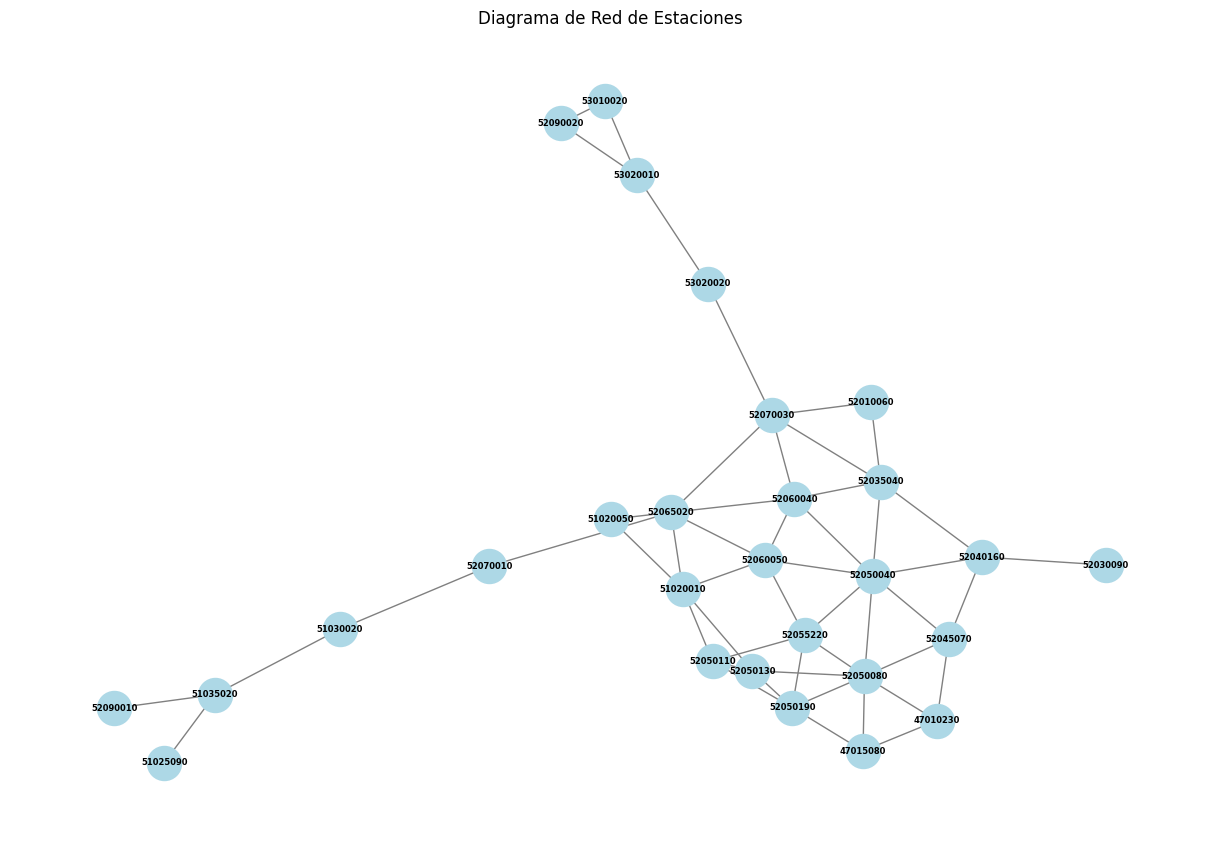

In [53]:
file_path = "../data/processed/stations_adjacencies.json"
# Cargar los datos desde el archivo JSON
with open(file_path, "r") as file:
    data = json.load(file)

# Crear el grafo y agregar conexiones
G = nx.Graph()
for station in data:
    G.add_edges_from(
        (station["cod"], neighbor) for neighbor in station["Estaciones_adyacentes"]
    )

# Dibujar el grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=600,
    node_color="lightblue",
    edge_color="gray",
    font_size=6,
    font_weight="bold",
)

plt.title("Diagrama de Red de Estaciones")
plt.show()

In [12]:
# LOAD DATA
path_data = "DATOS_EDA.csv"
dataframe_clean = pd.read_csv(path_data, index_col=0)
dataframe_clean.index = pd.to_datetime(dataframe_clean.index)
dataframe_clean["tipo_enso"] = dataframe_clean["tipo_enso"].astype("category")
dataframe_clean["region"] = dataframe_clean["region"].astype("category")
dataframe_clean["codigo_estacion"] = dataframe_clean["codigo_estacion"].astype("category")
dataframe_clean = dataframe_clean.drop(columns=["CantidadEventos_y"])
print(dataframe_clean.info())
print(dataframe_clean.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2006-01-01 to 2012-07-01
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   codigo_estacion                               2520 non-null   category
 1   promedio_mensual_precipitaciones              2520 non-null   float64 
 2   valor_mei_v2                                  2520 non-null   float64 
 3   tipo_enso                                     2520 non-null   category
 4   region                                        2520 non-null   category
 5   cantidad_eventos_movimientos_masas_mensuales  2520 non-null   int64   
 6   año                                           2520 non-null   int64   
 7   mes                                           2520 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 126.5 KB
None
             codigo_estacion  promedio_mensual

In [14]:
# Resumen estadístico
describe_df = dataframe_clean.describe()
print(describe_df)

       promedio_mensual_precipitaciones  valor_mei_v2  \
count                       2520.000000   2520.000000   
mean                         233.163213     -0.341667   
std                          234.824536      0.970494   
min                            0.000000     -2.430000   
25%                           69.900000     -1.055000   
50%                          150.650000     -0.370000   
75%                          310.075000      0.247500   
max                         1497.200000      2.210000   

       cantidad_eventos_movimientos_masas_mensuales          año          mes  
count                                   2520.000000  2520.000000  2520.000000  
mean                                       0.295635  2010.500000     6.500000  
std                                        1.327444     2.872851     3.452738  
min                                        0.000000  2006.000000     1.000000  
25%                                        0.000000  2008.000000     3.750000  
50%   

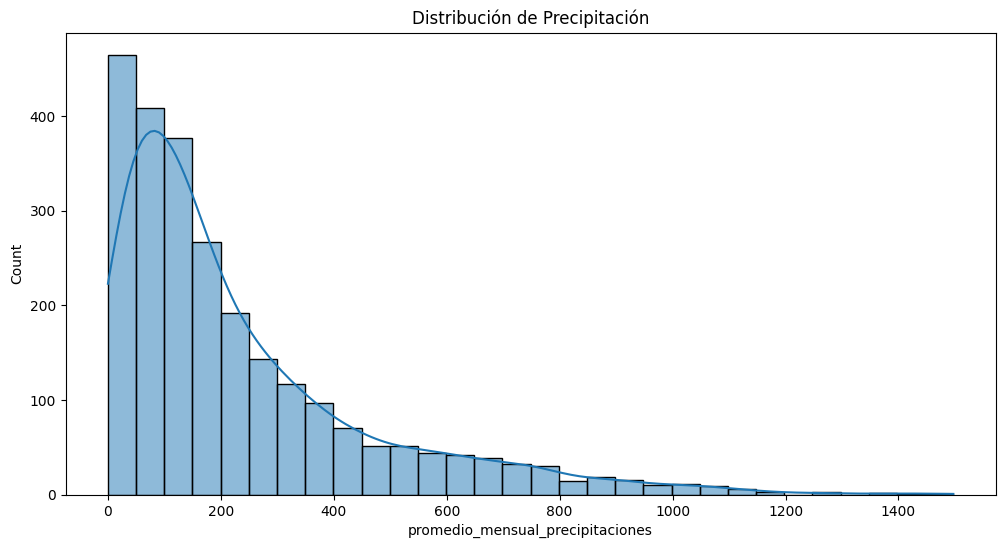

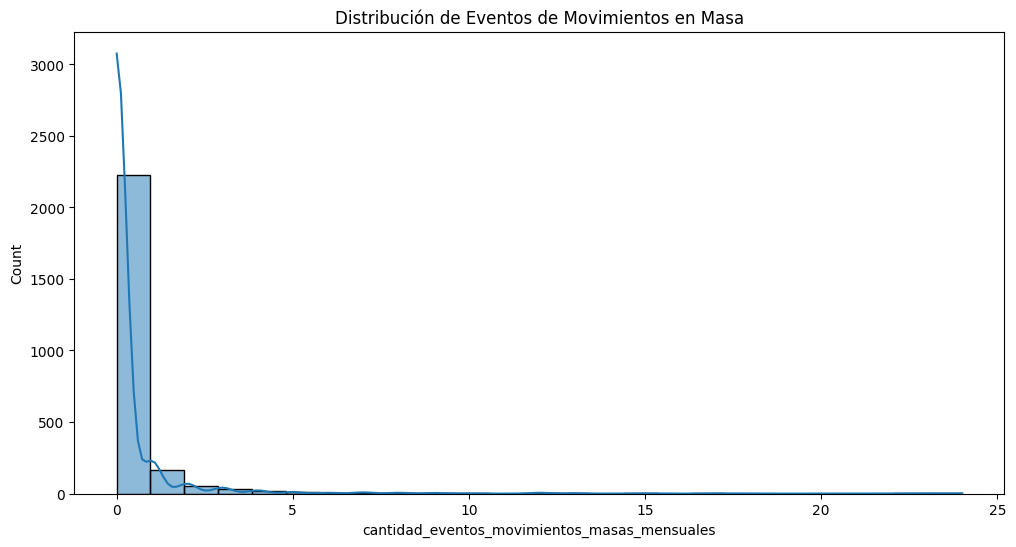

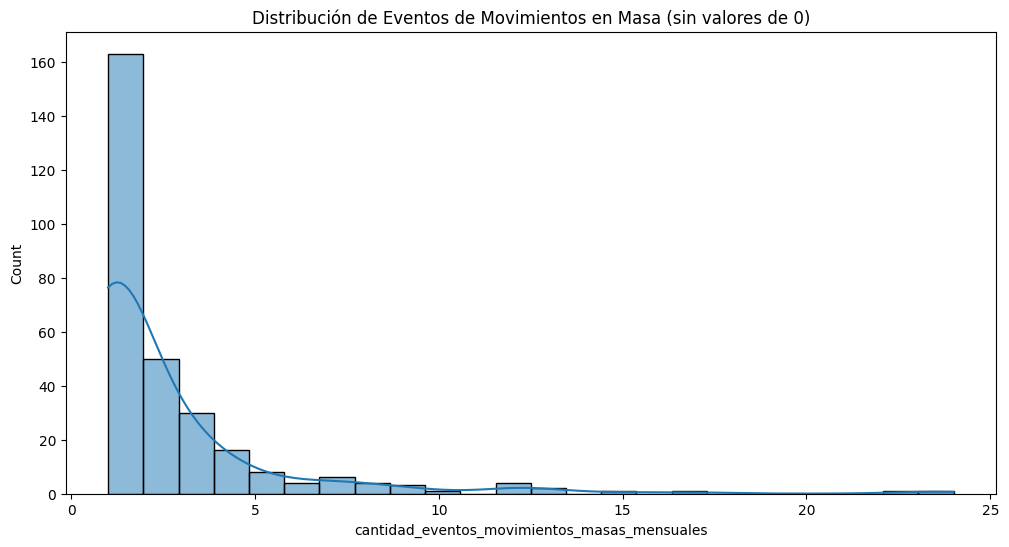

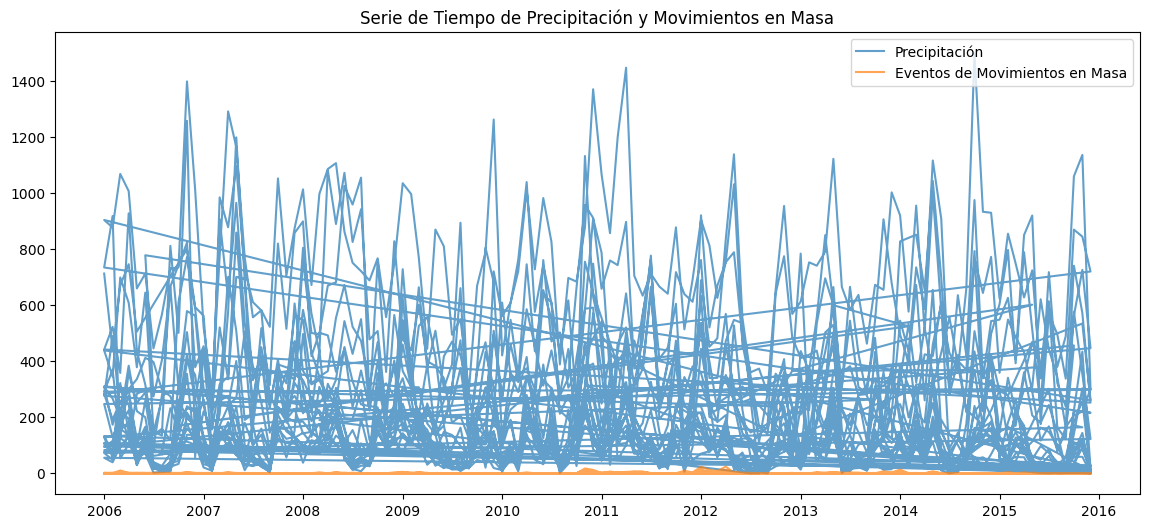

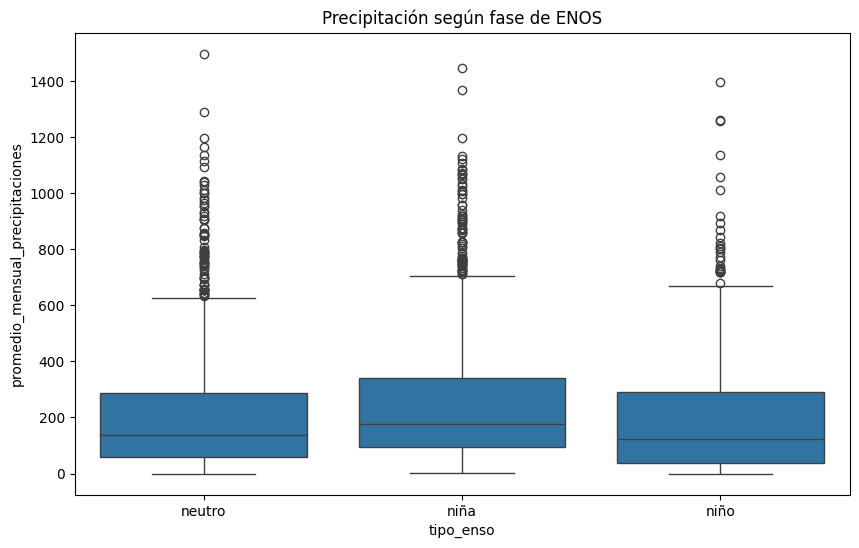

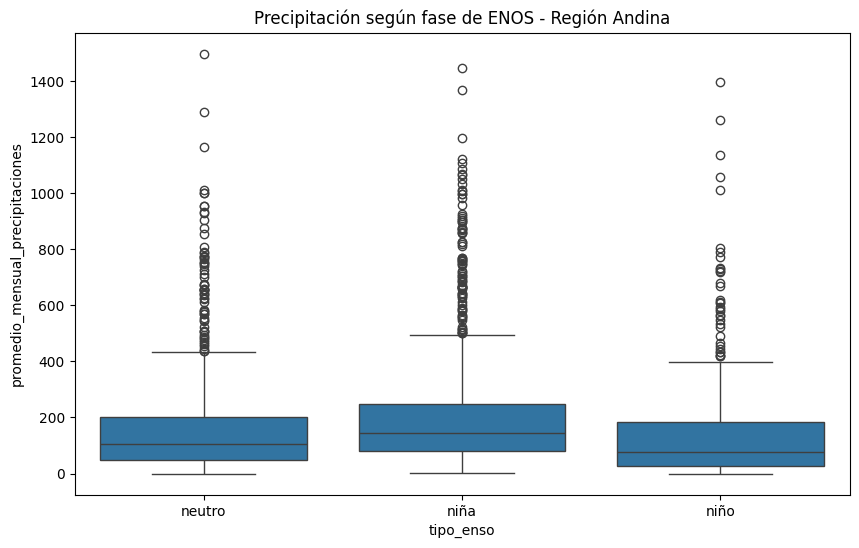

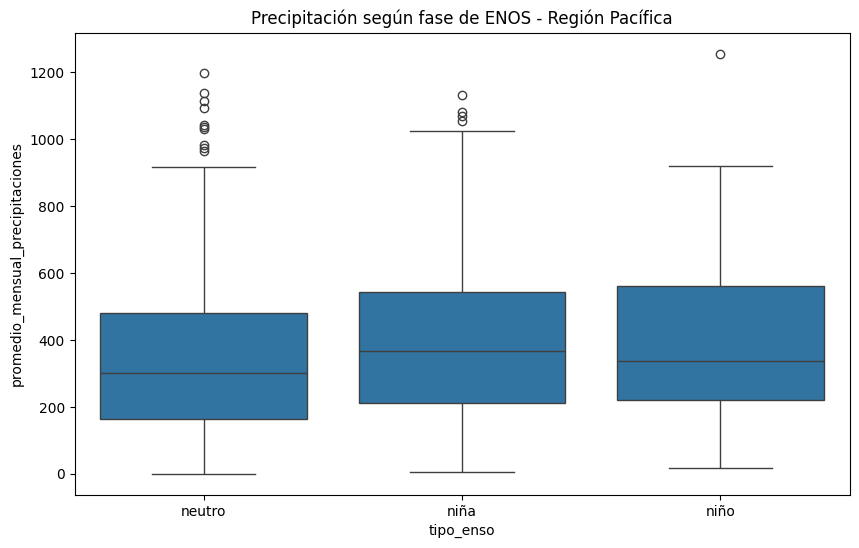

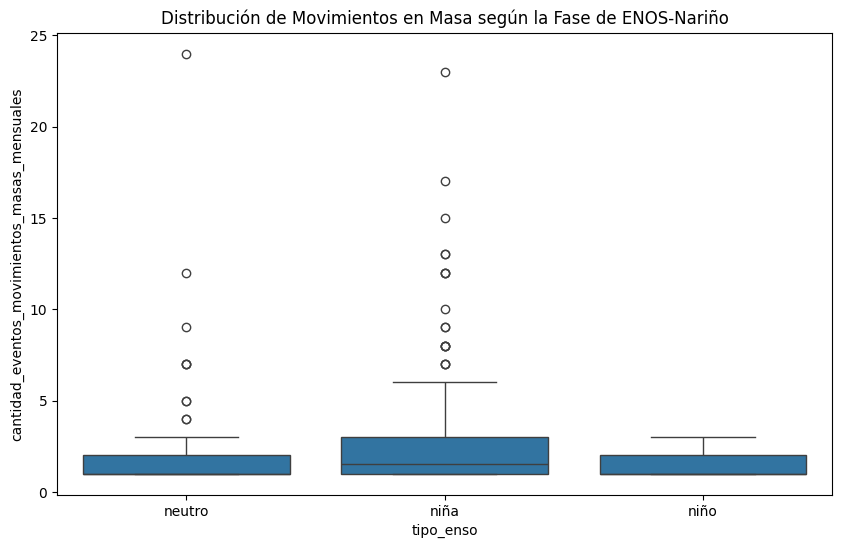

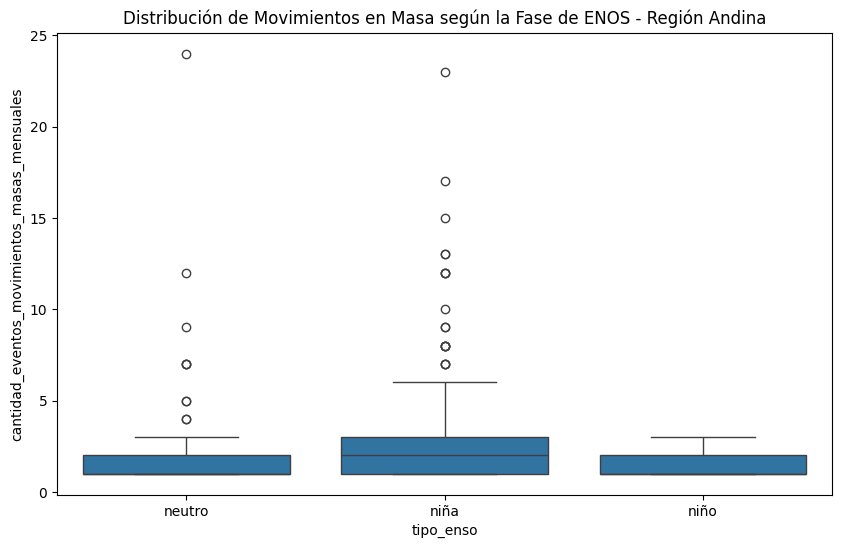

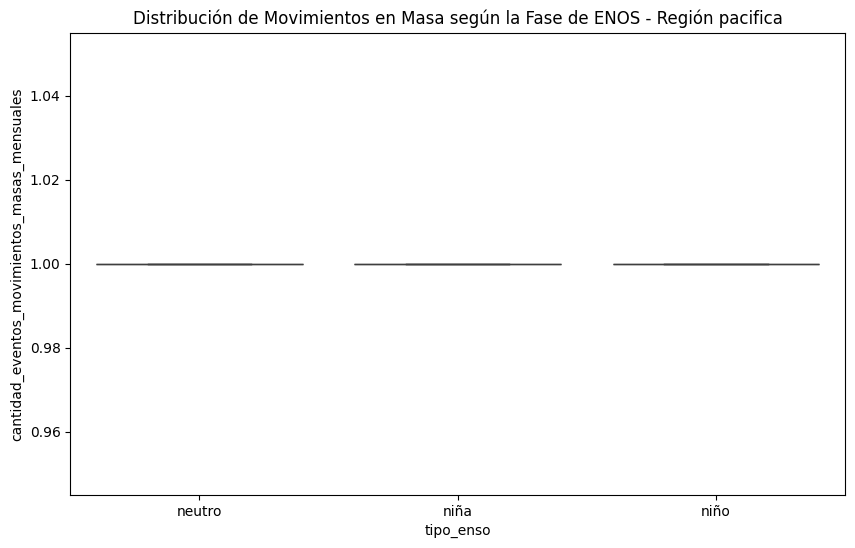

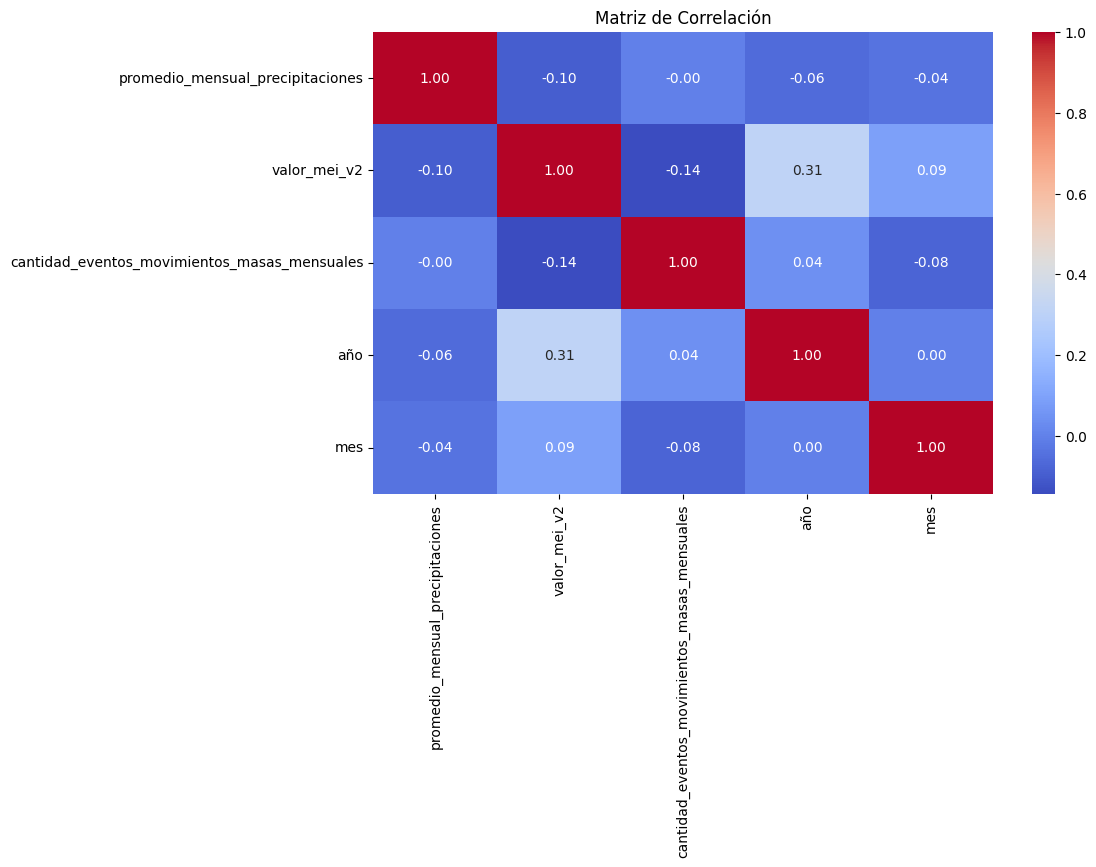

           promedio_mensual_precipitaciones  \
tipo_enso                                     
neutro                           216.184311   
niña                             257.169796   
niño                             209.767048   

           cantidad_eventos_movimientos_masas_mensuales  
tipo_enso                                                
neutro                                         0.174948  
niña                                           0.503145  
niño                                           0.036281  


In [32]:
# Visualización de distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(dataframe_clean["promedio_mensual_precipitaciones"], bins=30, kde=True)
plt.title("Distribución de Precipitación")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(
    dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"], bins=25, kde=True
)
plt.title("Distribución de Eventos de Movimientos en Masa")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(
    dataframe_clean[dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0][
        "cantidad_eventos_movimientos_masas_mensuales"
    ],
    bins=24,
    kde=True,
)
plt.title("Distribución de Eventos de Movimientos en Masa (sin valores de 0)")
plt.show()


# Series de tiempo
plt.figure(figsize=(14, 6))
plt.plot(
    dataframe_clean.index,
    dataframe_clean["promedio_mensual_precipitaciones"],
    label="Precipitación",
    alpha=0.7,
)
plt.plot(
    dataframe_clean.index,
    dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"],
    label="Eventos de Movimientos en Masa",
    alpha=0.7,
)
plt.legend()
plt.title("Serie de Tiempo de Precipitación y Movimientos en Masa")
plt.show()

# Boxplot de precipitaciones según fase ENOS
plt.figure(figsize=(10, 6))
sns.boxplot(x="tipo_enso", y="promedio_mensual_precipitaciones", data=dataframe_clean)
plt.title("Precipitación según fase de ENOS")
plt.show()

# Boxplot de precipitaciones según fase ENOS en la región Andina
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="tipo_enso",
    y="promedio_mensual_precipitaciones",
    data=dataframe_clean[dataframe_clean["region"] == "andina"],
)
plt.title("Precipitación según fase de ENOS - Región Andina")
plt.show()

# Boxplot de precipitaciones según fase ENOS en la región Pacífico
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="tipo_enso",
    y="promedio_mensual_precipitaciones",
    data=dataframe_clean[dataframe_clean["region"] == "pacifico"],
)
plt.title("Precipitación según fase de ENOS - Región Pacífica")
plt.show()

# Boxplot de movimientos según fase ENOS
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="tipo_enso",
    y="cantidad_eventos_movimientos_masas_mensuales",
    data=dataframe_clean[
        dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0
    ],
)
plt.title("Distribución de Movimientos en Masa según la Fase de ENOS-Nariño")
plt.show()

# Boxplot de movimientos según fase ENOS en la región Andina
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="tipo_enso",
    y="cantidad_eventos_movimientos_masas_mensuales",
    data=dataframe_clean[
        (dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0)
        & (dataframe_clean["region"] == "andina")
    ],
)
plt.title("Distribución de Movimientos en Masa según la Fase de ENOS - Región Andina")
plt.show()

# Boxplot de movimientos según fase ENOS en la región Andina
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="tipo_enso",
    y="cantidad_eventos_movimientos_masas_mensuales",
    data=dataframe_clean[
        (dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0)
        & (dataframe_clean["region"] == "pacifico")
    ],
)
plt.title("Distribución de Movimientos en Masa según la Fase de ENOS - Región pacifica")
plt.show()

# Correlación
plt.figure(figsize=(10, 6))
corr_matrix = dataframe_clean.select_dtypes(include=["number"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Comparación de fases extremas de ENOS
enso_groups = dataframe_clean.groupby("tipo_enso")[
    ["promedio_mensual_precipitaciones", "cantidad_eventos_movimientos_masas_mensuales"]
].mean()

print(enso_groups)

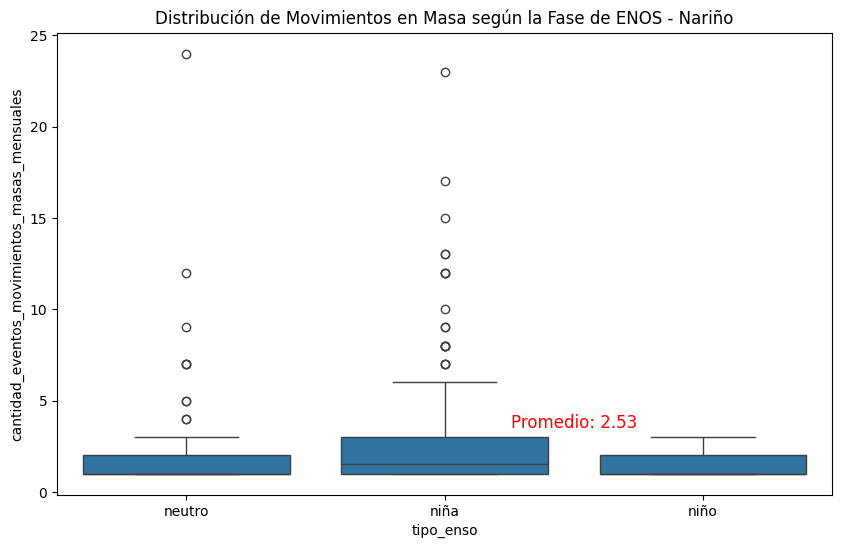

In [30]:
filtered_data = dataframe_clean[
    dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0
]

# Calcular promedio
promedio = filtered_data["cantidad_eventos_movimientos_masas_mensuales"].mean()

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="tipo_enso", y="cantidad_eventos_movimientos_masas_mensuales", data=filtered_data
)

# Mostrar el valor del promedio en la parte superior del gráfico
ax.text(
    x=1.5,  # Posición en el eje X (ajústala según la distribución)
    y=promedio + 1,  # Posición en el eje Y
    s=f"Promedio: {promedio:.2f}",
    fontsize=12,
    color="red",
    ha="center",
)

plt.title("Distribución de Movimientos en Masa según la Fase de ENOS - Nariño")
plt.show()

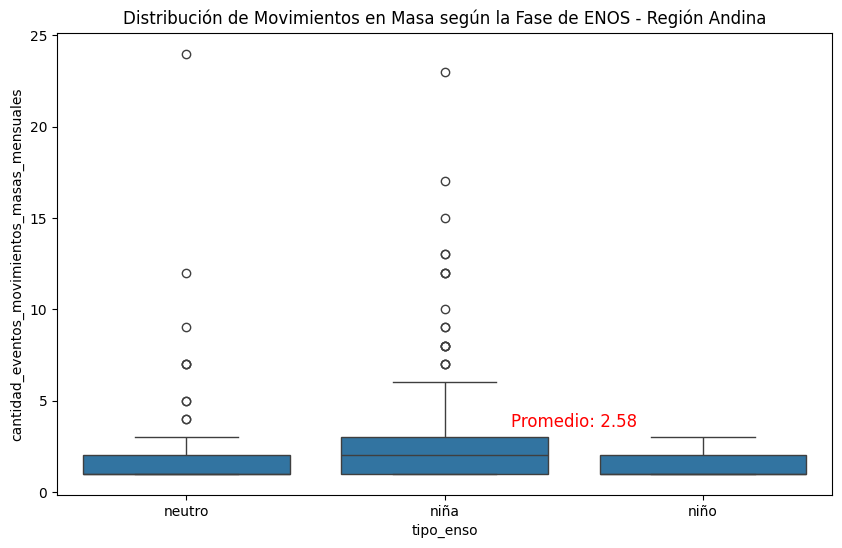

In [44]:
filtered_data = dataframe_clean[
    (dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0)
    & (dataframe_clean["region"] == "andina")
]

# Calcular promedio
promedio = filtered_data["cantidad_eventos_movimientos_masas_mensuales"].mean()

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="tipo_enso", y="cantidad_eventos_movimientos_masas_mensuales", data=filtered_data
)

# Mostrar el valor del promedio en la parte superior del gráfico
ax.text(
    x=1.5,  # Posición en el eje X (ajústala según la distribución)
    y=promedio + 1,  # Posición en el eje Y
    s=f"Promedio: {promedio:.2f}",
    fontsize=12,
    color="red",
    ha="center",
)

plt.title("Distribución de Movimientos en Masa según la Fase de ENOS - Región Andina")
plt.show()

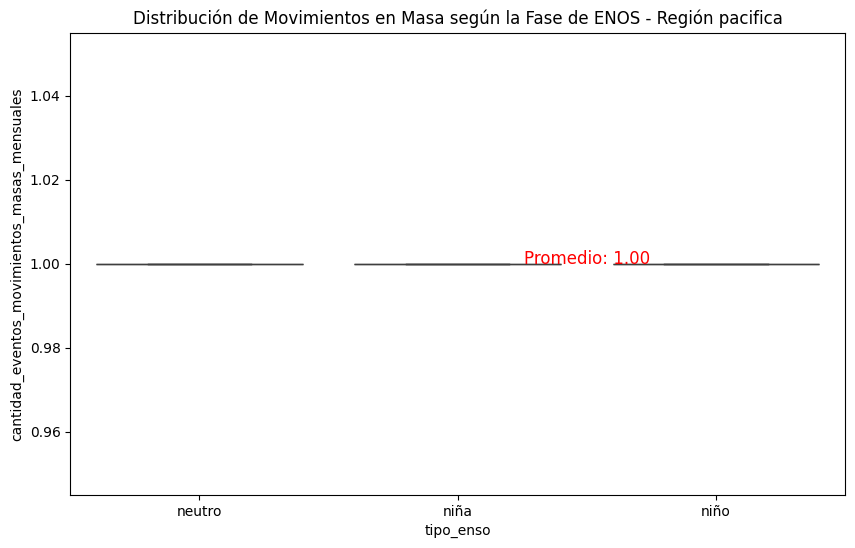

In [37]:
filtered_data = dataframe_clean[
    (dataframe_clean["cantidad_eventos_movimientos_masas_mensuales"] > 0)
    & (dataframe_clean["region"] == "pacifico")
]

# Calcular promedio
promedio = filtered_data["cantidad_eventos_movimientos_masas_mensuales"].mean()

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="tipo_enso", y="cantidad_eventos_movimientos_masas_mensuales", data=filtered_data
)

# Mostrar el valor del promedio en la parte superior del gráfico
ax.text(
    x=1.5,  # Posición en el eje X (ajústala según la distribución)
    y=promedio,  # Posición en el eje Y
    s=f"Promedio: {promedio:.2f}",
    fontsize=12,
    color="red",
    ha="center",
)

plt.title("Distribución de Movimientos en Masa según la Fase de ENOS - Región pacifica")
plt.show()

In [56]:
#remover los datos de la región pacífico
dataframe_norma = dataframe_clean[dataframe_clean["region"] != "pacifico"]
# drop the region column
dataframe_norma = dataframe_norma.drop(columns=["region"])
print(dataframe_norma.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2006-01-01 to 2015-12-01
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   codigo_estacion                               1920 non-null   category
 1   promedio_mensual_precipitaciones              1920 non-null   float64 
 2   valor_mei_v2                                  1920 non-null   float64 
 3   tipo_enso                                     1920 non-null   category
 4   cantidad_eventos_movimientos_masas_mensuales  1920 non-null   int64   
 5   año                                           1920 non-null   int64   
 6   mes                                           1920 non-null   int64   
dtypes: category(2), float64(2), int64(3)
memory usage: 94.6 KB
None


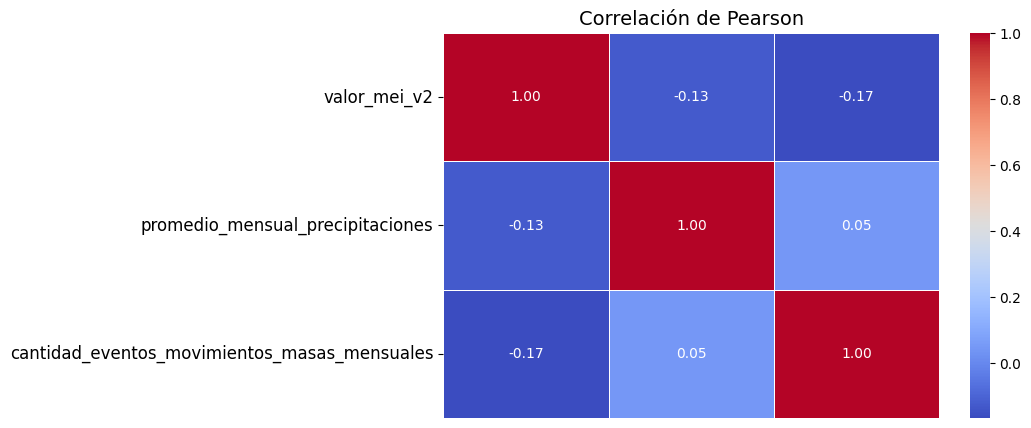

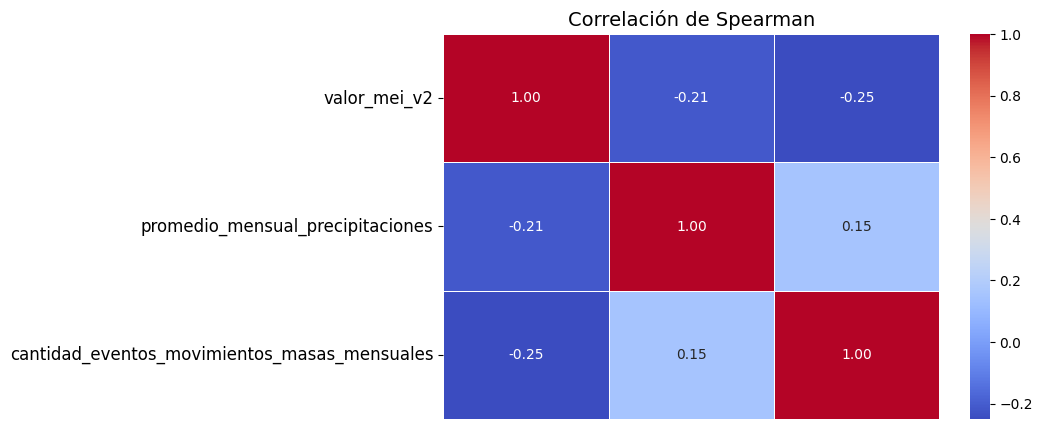

(                                              valor_mei_v2  \
 valor_mei_v2                                      1.000000   
 promedio_mensual_precipitaciones                 -0.127729   
 cantidad_eventos_movimientos_masas_mensuales     -0.165661   
 
                                               promedio_mensual_precipitaciones  \
 valor_mei_v2                                                         -0.127729   
 promedio_mensual_precipitaciones                                      1.000000   
 cantidad_eventos_movimientos_masas_mensuales                          0.045933   
 
                                               cantidad_eventos_movimientos_masas_mensuales  
 valor_mei_v2                                                                     -0.165661  
 promedio_mensual_precipitaciones                                                  0.045933  
 cantidad_eventos_movimientos_masas_mensuales                                      1.000000  ,
                                   

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulación de datos (en caso de no tener el dataset real)
# Se asume que el DataFrame ya está cargado en la variable df
# df = pd.read_csv("datos.csv", parse_dates=["FechaMensual"], index_col="FechaMensual")

# Cálculo de correlaciones
correlaciones = dataframe_norma[
    [
        "valor_mei_v2",
        "promedio_mensual_precipitaciones",
        "cantidad_eventos_movimientos_masas_mensuales",
    ]
].corr(method="pearson")

correlaciones_spearman = dataframe_norma[
    [
        "valor_mei_v2",
        "promedio_mensual_precipitaciones",
        "cantidad_eventos_movimientos_masas_mensuales",
    ]
].corr(method="spearman")

# Visualización con un heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.xticks([])
plt.yticks(rotation=0, fontsize=12)  # Mantener etiquetas del eje Y legibles
plt.title("Correlación de Pearson", fontsize=14)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(
    correlaciones_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.xticks([])
# plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.yticks(rotation=0, fontsize=12)  # Mantener etiquetas del eje Y legibles
plt.title("Correlación de Spearman", fontsize=14)
plt.show()

# Retornar valores de correlación
correlaciones, correlaciones_spearman

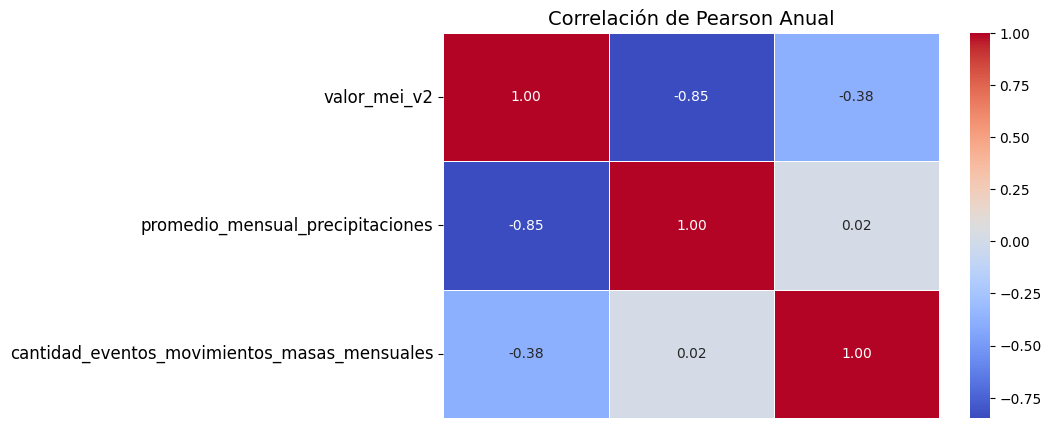

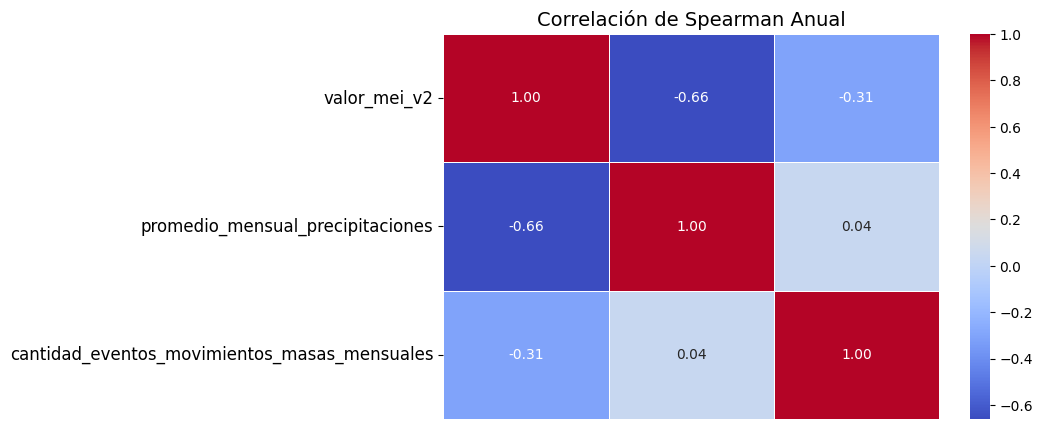

In [66]:
# Agrupar por año y calcular la media anual
# df_anual = dataframe_norma.drop(columns=["mes"]).groupby("año").mean()
df_anual = dataframe_norma.groupby("año").mean(numeric_only=True)

# # Calcular correlaciones anuales
# correlacion_anual_pearson = df_anual.corr(method="pearson")
# correlacion_anual_spearman = df_anual.corr(method="spearman")

# Cálculo de correlaciones
correlacion_anual_pearson = df_anual[
    [
        "valor_mei_v2",
        "promedio_mensual_precipitaciones",
        "cantidad_eventos_movimientos_masas_mensuales",
    ]
].corr(method="pearson")

correlacion_anual_spearman = df_anual[
    [
        "valor_mei_v2",
        "promedio_mensual_precipitaciones",
        "cantidad_eventos_movimientos_masas_mensuales",
    ]
].corr(method="spearman")

# Visualización con un heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    correlacion_anual_pearson, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
# plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.xticks([])
plt.yticks(rotation=0, fontsize=12)  # Mantener etiquetas del eje Y legibles
plt.title("Correlación de Pearson Anual", fontsize=14)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(
    correlacion_anual_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.xticks([])
# plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.yticks(rotation=0, fontsize=12)  # Mantener etiquetas del eje Y legibles
plt.title("Correlación de Spearman Anual", fontsize=14)
plt.show()

# Retornar valores de correlación
# correlaciones, correlaciones_spearman